In [22]:
import math
import statistics
import matplotlib.pyplot as plt
from reversi import *

def SD(data):
   "Standard deviation of the standard deviation."
   n = len(data)
   return statistics.stdev(data) * math.sqrt(math.e * math.pow(1 - (1 / n), n - 1) - 1)

engines = {
   f'Iteration {i}' : Cassandra(r"G:\\Cassandra\\Solver.exe", rf"G:\\Cassandra\\iteration{i}.model", intensity=0)
   for i in range(1, 7)
}
engines['Edax4.4 level 0'] = Edax(r"G:\\edax-ms-windows\\edax-4.4", level=0, tasks=1, hash_table_size=8)

test_files = [
   "data\\Edax4.4_selfplay_level_5_from_e54.gs",
   "data\\Edax4.4_selfplay_level_10_from_e54.gs",
   "data\\Edax4.4_selfplay_level_15_from_e54.gs",
   "data\\Edax4.4_selfplay_level_20_from_e54.gs",
   "data\\random_selfplay_from_e54.gs",
]
test_data = [
    (scored_pos.pos, scored_pos.score)
    for file in test_files
    for scored_game in read_file(file)
    for scored_pos in scored_positions(scored_game)
    if scored_pos.is_score_defined()
]
pos, exact_scores = zip(*test_data)

Iteration 1: stdev=8.116771703277793 ± 0.011025860404797522 mad=6.137325022235508
Iteration 2: stdev=7.076431902223165 ± 0.009612657984018462 mad=5.2862125087189025
Iteration 3: stdev=6.954573874445466 ± 0.00944712547274452 mad=5.181164956101018
Iteration 4: stdev=6.919768638834942 ± 0.009399845878932271 mad=5.151950635326594
Iteration 5: stdev=6.90576342264147 ± 0.009380821128165179 mad=5.139786612932393
Iteration 6: stdev=6.900227945076518 ± 0.009373301709714565 mad=5.134597712602828
Edax4.4 level 0: stdev=7.099647942033692 ± 0.00964422235083624 mad=5.129751553711932


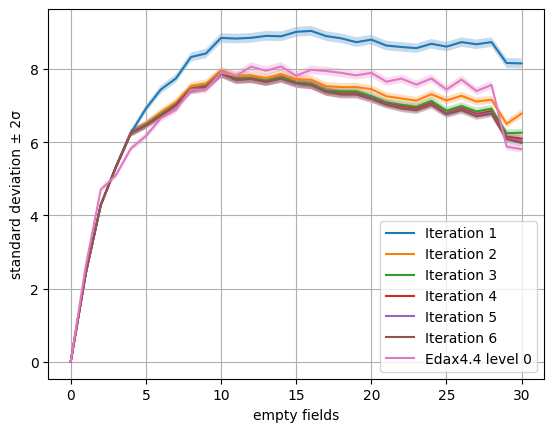

In [23]:
for name, engine in engines.items():
    engine_scores = [line.window.lower for line in engine.solve_many(pos)]

    empty_counts = []
    stdev = []
    sd = []
    for e in range(0, 65):
        diff = [a - b for a, b, p in zip(engine_scores, exact_scores, pos) if p.empty_count() == e]
        if len(diff) < 2:
            continue
        empty_counts.append(e)
        stdev.append(statistics.stdev(diff))
        sd.append(SD(diff))

    plt.plot(empty_counts, stdev, label=name)
    upper_bound = [x + 2 * d for x, d in zip(stdev, sd)]
    lower_bound = [x - 2 * d for x, d in zip(stdev, sd)]
    plt.fill_between(empty_counts, lower_bound, upper_bound, alpha=.25)

    diff = [a - b for a, b in zip(engine_scores, exact_scores)]
    stdev = statistics.stdev(diff)
    sd = SD(diff)
    mad = statistics.mean(abs(d) for d in diff)
    print(f'{name}: {stdev=} ± {sd} {mad=}')

plt.xlabel('empty fields')
plt.ylabel('standard deviation ± 2σ')
plt.grid(True, which='major', axis='both')
plt.legend(loc=4)
plt.savefig(r'G:\SD.png')
plt.show()